<a href="https://colab.research.google.com/github/rugellioliveira/Projeto7-Bitcoin/blob/main/Projeto_7(Bitcoin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O bitcoin é uma moeda virtual – a primeira criada no mundo – e pode ser usado para a compra de serviços, produtos e quaisquer outros itens em estabelecimentos que aceitem ser pagos com ele.

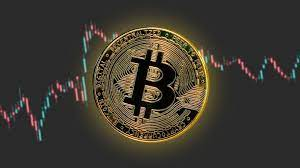

In [ ]:
# Bibliotecas
import numpy as np
import pandas as pd

# Bibliotecas para utilizar o Plotly (gráfico interativos)
import plotly.express as px
import plotly.graph_objects as Dash

In [ ]:
# Leitura da base de Dados
Base_Dados = pd.read_excel('Dados_Bitcoin.xlsx')

# Verifica
Base_Dados.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-03-24,1040.469971,934.357971,1038.449951,937.520020,491038016,937.520020
1,2017-03-25,975.760986,903.713013,936.539978,972.778992,435803008,972.778992
2,2017-03-26,1007.960022,954.185974,974.015015,966.724976,303668000,966.724976
3,2017-03-27,1046.400024,971.984009,972.054993,1045.770020,372535008,1045.770020
4,2017-03-28,1064.650024,1027.729980,1044.579956,1047.150024,326332000,1047.150024
5,2017-03-29,1055.130005,1015.880005,1046.079956,1039.969971,298457984,1039.969971
6,2017-03-30,1049.290039,1020.039978,1042.209961,1026.430054,352968992,1026.430054
7,2017-03-31,1074.920044,1026.640015,1026.640015,1071.790039,447287008,1071.790039
8,2017-04-01,1091.719971,1061.089966,1071.709961,1080.500000,289633984,1080.500000
9,2017-04-02,1107.589966,1075.449951,1080.609985,1102.170044,514187008,1102.170044


In [ ]:
# Setar o index
Base_Dados.set_index('Date', inplace=True )

In [ ]:
# Gráfico de Linhas
fig = px.line( Base_Dados, y='Close')

# Plotar
fig.show()

In [ ]:
# Gerar médias móveis
Media_Movel = Base_Dados['Close'].rolling(5).mean()
Media_Tendencia = Base_Dados['Close'].rolling(30).mean()

In [ ]:
# Criando uma Figura
Figura = Dash.Figure()

# Adiciona o primeiro eixo
Figura.add_trace(
    Dash.Scatter(
        x = Base_Dados.index,
        y = Base_Dados.Close,
        mode = 'lines',
        name = 'Fechamento',
        marker_color = '#ff7f0e',
        opacity = 0.5,
    )
)

# Adiciona a média
Figura.add_trace(
    Dash.Scatter(
        x = Base_Dados.index,
        y = Media_Movel,
        mode = 'lines',
        name = 'Média Móvel',
        marker_color = '#d62728',
        opacity = 0.5,
    )
)

# Adiciona a tendência
Figura.add_trace(
    Dash.Scatter(
        x = Base_Dados.index,
        y = Media_Tendencia,
        mode = 'lines',
        name = 'Tendência',
        marker_color = '#2ca02c'
    )
)

# Ajustes no layout
Figura.update_layout(

    # Título
    title='Análise do fechamento Bitcoin',
    # Tamanho
    titlefont_size=20,

    # Ajusta o eixo x
    xaxis = dict(
        title='Período Histórico',
        titlefont_size = 14,
        tickfont_size=10,
    ),

    # Ajusta o eixo y
    yaxis = dict(
        title='Preço fechamento ($)',
        titlefont_size = 14,
        tickfont_size=10,
    ),

    # Parâmetros para Legenda
    legend = dict (
        y=1,
        x=1,
        bgcolor='rgba(255, 255, 255, 1)',
        bordercolor='rgba(255, 255, 255, 1)'
    )

)